IMPORT STATEMENTS

In [1]:
#import libraies
import pandas as pd

import numpy as np
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, f1_score, recall_score, accuracy_score,precision_score


#Load Dataset

In [2]:
df=pd.read_csv('Dataset/ALLFLOWMETER_HIKARI2021.csv')


PREPROCESSING

In [5]:
#preprocessing
df=df.iloc[:,2:]
#print(df.head(3))
id_columns = ['uid', 'originh', 'originp', 'responh', 'responp']
target_columns = ['traffic_category', 'Label']


FEATURE CATEGORIZATION

In [3]:
feature_columns = [
    col for col in df.columns
        if col not in id_columns + target_columns
]

numerical_columns = [
    col for col in feature_columns
        if df[col].dtype in [int, np.int64, float, np.float64]
           #Oblect type columns are not considered
]
categorical_columns = [
    col for col in feature_columns
        if col not in numerical_columns
]
print(len(numerical_columns), len(categorical_columns))


NameError: name 'id_columns' is not defined

# Feature Extraction

C:\Users\aatis\AppData\Local\Temp\ipykernel_17420\1134300529.py:6: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  return df.corrwith(df[attr]).sort_values(ascending=False)


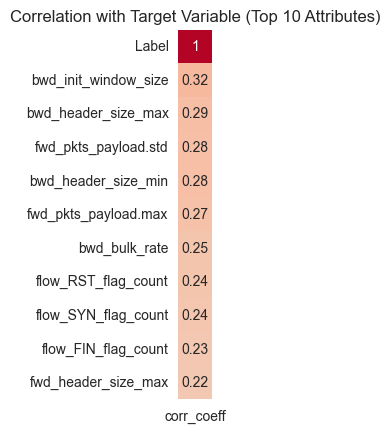

In [23]:
x=df[feature_columns]
Y = df[target_columns[1]]
import seaborn as sns
import matplotlib.pyplot as plt
def find_corr_with_attr(df, attr):
    return df.corrwith(df[attr]).sort_values(ascending=False)

# Find correlation between target variable and all other attributes
corr_with_target = find_corr_with_attr(df, 'Label')

# Create a DataFrame with correlation coefficients of top 10 attributes
corr_df = pd.DataFrame(corr_with_target[:11], columns=['corr_coeff'])

# Create heatmap of correlation coefficients
sns.heatmap(corr_df, cmap='coolwarm', annot=True, vmin=-1, vmax=1, center=0, square=True, cbar=False)
plt.title('Correlation with Target Variable (Top 10 Attributes)')
plt.show()


# Feature selection

In [7]:
impFeatures=['bwd_init_window_size','fwd_pkts_payload.max','bwd_iat.min','fwd_iat.min',
             'fwd_subflow_bytes','fwd_pkts_payload.tot','fwd_pkts_payload.min','bwd_bulk_rate',
             'flow_pkts_payload.avg','down_up_ratio']
X=df[impFeatures]
y = df[target_columns[1]]


DIFINING FEATURES AND CATEGORIES SEPERATELY

In [6]:
#X = df[feature_columns].values
#y = df[target_columns[1]].values
#This will also function as sets for train test sets

Text(0, 0.5, 'Count')

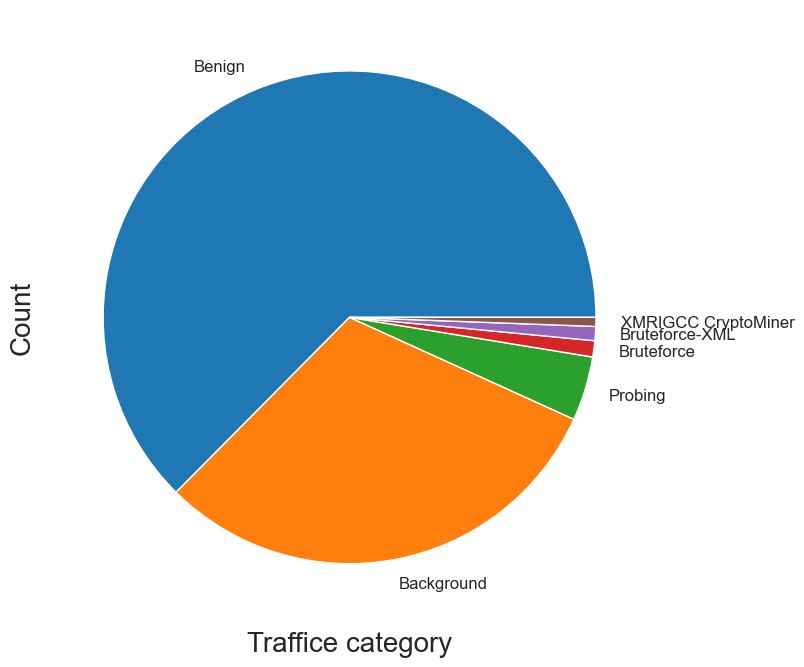

In [4]:

ax = df['traffic_category'].value_counts().plot(kind='pie', rot=0, figsize=(14, 8), fontsize=12)

ax.set_xlabel('Traffice category', fontsize=20)
ax.set_ylabel('Count', fontsize=20)

#plt.savefig('traffic-category-count.pdf', dpi=600)




NameError: name 'plt' is not defined

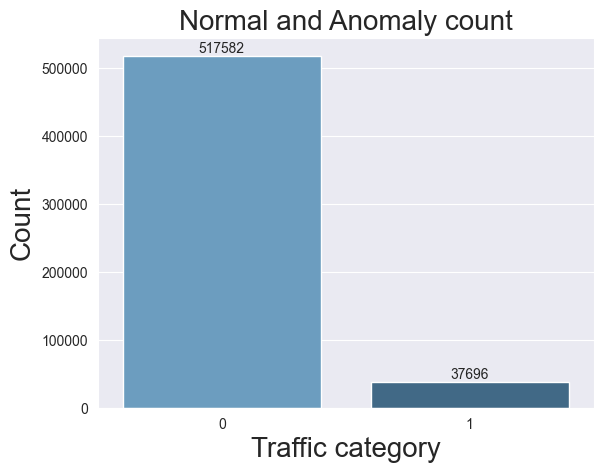

In [6]:
import seaborn as sns

ax1 = sns.barplot(x=df['Label'].value_counts().index, y=df['Label'].value_counts().values,palette="Blues_d")
ax1.set_xlabel('Traffic category', fontsize=20)
ax1.set_ylabel('Count', fontsize=20)
ax1.set_title('Normal and Anomaly count',fontsize=20)
# add the count as text on each bar
for p in ax1.patches:
    ax1.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points', fontsize=10)
plt.savefig('traffic-anomaly-count.pdf', dpi=600)

SPLITING DATA INTO TESTING AND TRAINING SET

In [ ]:
# x,y are from earlier processing
#x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)


MODELS

FITTING DATA

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print(scaler.fit(x_train))
#scaler=scaler.fit(x_train)
#scaler.transform(x_train)
#x_train=scaler.fit(x_train)
#x_train_x=scaler.transform(x_train)

# preprocessing and train test split

In [8]:
from sklearn.preprocessing import MinMaxScaler

# Normalize the input features
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

LSTM WITH AUTOENCODER #needs time series data for best results

In [ ]:
"""""
from keras.models import Sequential
from keras.layers import LSTM, Dropout, TimeDistributed
from keras.layers import Dense
from keras.layers import RepeatVector
model = Sequential()
model.add(LSTM(128, input_shape=(79)))
model.add(Dropout(rate=0.2))

model.add(RepeatVector(79))

model.add(LSTM(128, return_sequences=True))
model.add(Dropout(rate=0.2))
model.add(TimeDistributed(Dense(79,activation='sigmoid')))
model.compile(optimizer='adam', loss='mae')
model.summary()

# fit model
history = model.fit(X_train,y_train, epochs=3, batch_size=79,  verbose=1)

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()"""

ARTIFICIAL NEURAL NETWORKS

In [18]:
# Define the model
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(18, activation='relu', input_shape=(10,)),
  tf.keras.layers.Dense(14, activation='relu'),
  tf.keras.layers.Dense(10, activation='relu'),
  tf.keras.layers.Dense(6, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=6, validation_data=(X_test, y_test))

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
model.save('model.h5')
model.summary()
#result(X_train,X_test)
print('Test Accuracy:', test_acc)


Epoch 1/6
13882/13882 [==============================] - 61s 4ms/step - loss: 0.1648 - accuracy: 0.9320 - val_loss: 0.1470 - val_accuracy: 0.9325
Epoch 2/6
13882/13882 [==============================] - 52s 4ms/step - loss: 0.1437 - accuracy: 0.9328 - val_loss: 0.1400 - val_accuracy: 0.9333
Epoch 3/6
13882/13882 [==============================] - 52s 4ms/step - loss: 0.1400 - accuracy: 0.9330 - val_loss: 0.1407 - val_accuracy: 0.9333
Epoch 4/6
13882/13882 [==============================] - 49s 4ms/step - loss: 0.1381 - accuracy: 0.9330 - val_loss: 0.1345 - val_accuracy: 0.9332
Epoch 5/6
13882/13882 [==============================] - 55s 4ms/step - loss: 0.1367 - accuracy: 0.9327 - val_loss: 0.1352 - val_accuracy: 0.9333
Epoch 6/6
13882/13882 [==============================] - 57s 4ms/step - loss: 0.1361 - accuracy: 0.9327 - val_loss: 0.1382 - val_accuracy: 0.9330
3471/3471 - 9s - loss: 0.1382 - accuracy: 0.9330 - 9s/epoch - 3ms/step
Model: "sequential_1"
_______________________________

In [13]:
from sklearn.metrics import accuracy_score, f1_score, recall_score
import tensorflow as tf

# Load the saved model
loaded_model = tf.keras.models.load_model('model.h5')

# Make predictions on the test set
y_pred = loaded_model.predict(X_test)

# Convert probabilities to binary predictions
y_pred_binary = (y_pred > 0.25).astype('int32')
print(y_pred,y_pred_binary)
# Calculate evaluation metrics
test_acc = accuracy_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
pi=precision_score(y_test, y_pred_binary)
# Print evaluation metrics
print('Test Accuracy:', test_acc)
print('F1 Score:', f1)
print('Recall:', recall)
print('precision:', pi)

1875/1875 [==============================] - 5s 2ms/step
[[3.0986835e-23]
 [2.4600303e-29]
 [2.3469727e-23]
 ...
 [7.0196040e-09]
 [7.5315814e-03]
 [3.0047888e-01]] [[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [1]]
Test Accuracy: 0.8504833333333334
F1 Score: 0.4655347036044087
Recall: 0.9471515151515152
p: 0.308609794628752


#model testing method for real world data

In [15]:
import numpy as np

# Loop through threshold values
thresholds = np.arange(0.05, 1, 0.05)
f1_scores = []
for threshold in thresholds:
    # Convert probabilities to binary predictions using the threshold
    y_pred_binary = (y_pred > threshold).astype('int32')
    # Calculate F1 score
    f1 = f1_score(y_test, y_pred_binary)
    # Add F1 score to list of scores
    f1_scores.append(f1)

# Find the threshold that gives the highest F1 score
best_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_idx]

# Print best threshold and corresponding F1 score
print('Best threshold:', best_threshold)

Best threshold: 0.25
F1 score at best threshold: 0.4655347036044087
Best threshold: 0.25
F1 score at best threshold: 0.4655347036044087


In [8]:

# Load the pre-trained model
model = tf.keras.models.load_model('model.h5')
# Create a function to preprocess a single record
def preprocess_record(record):
    records='preproceesing of real world data'
    # Return the preprocessed record as a numpy array
    return tf.convert_to_tensor(records)


# Take a single record as input
record = np.array([
])

# Preprocess the record
preprocessed_record = preprocess_record(record)

# Make a prediction on the preprocessed record
prediction = model.predict(preprocessed_record)
print(prediction)
if (prediction <= 0.5):
    print('anomaly')
else:
    print('normal')

KeyboardInterrupt: 

# stacked auto encode implementation 3 levels

In [9]:
from keras import Sequential
from keras.layers import Dense
# Build the first autoencoder
model1 = Sequential()
model1.add(Dense(10, activation='relu', input_shape=(X_train.shape[1],)))
model1.add(Dense(4, activation='relu'))
model1.add(Dense(10, activation='relu'))
model1.add(Dense(X_train.shape[1], activation='sigmoid'))
model1.compile(optimizer='adam', loss='mean_squared_error')

# Train the first autoencoder
model1.fit(X_train, X_train, epochs=10, batch_size=32, validation_data=(X_test, X_test))

# Extract the output of the first autoencoder
encoder1 = Sequential()
encoder1.add(model1.layers[0])
encoder1.add(model1.layers[1])
encoder1.add(model1.layers[2])
encoder1.compile(optimizer='adam', loss='mean_squared_error')
encoded_X_train = encoder1.predict(X_train)
encoded_X_test = encoder1.predict(X_test)

# Build the second autoencoder
model2 = Sequential()
model2.add(Dense(16, activation='relu', input_shape=(encoder1.output_shape[1],)))
model2.add(Dense(8, activation='relu'))
model2.add(Dense(16, activation='relu'))
model2.add(Dense(encoder1.output_shape[1], activation='sigmoid'))
model2.compile(optimizer='adam', loss='mean_squared_error')

# Train the second autoencoder
model2.fit(encoded_X_train, encoded_X_train, epochs=10, batch_size=32, validation_data=(encoded_X_test, encoded_X_test))

# Extract the output of the second autoencoder
encoder2 = Sequential()
encoder2.add(model2.layers[0])
encoder2.add(model2.layers[1])
encoder2.compile(optimizer='adam', loss='mean_squared_error')
encoded_X_train_final = encoder2.predict(encoded_X_train)
encoded_X_test_final = encoder2.predict(encoded_X_test)

# Add classification layer and fine-tune the model
model = Sequential()
model.add(encoder2)
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the performance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred = [1 if p>=0.25 else 0 for p in y_pred]

# Calculate evaluation metrics
acc = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print evaluation metrics
print('Accuracy:', acc)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)



Epoch 1/10
13882/13882 [==============================] - 50s 3ms/step - loss: 0.0029 - val_loss: 3.5086e-04
Epoch 2/10
13882/13882 [==============================] - 46s 3ms/step - loss: 1.8940e-04 - val_loss: 7.1118e-05
Epoch 3/10
13882/13882 [==============================] - 46s 3ms/step - loss: 6.1660e-05 - val_loss: 3.7050e-05
Epoch 4/10
13882/13882 [==============================] - 46s 3ms/step - loss: 3.6001e-05 - val_loss: 2.8590e-05
Epoch 5/10
13882/13882 [==============================] - 46s 3ms/step - loss: 2.9081e-05 - val_loss: 2.0651e-05
Epoch 6/10
13882/13882 [==============================] - 47s 3ms/step - loss: 2.4631e-05 - val_loss: 2.6379e-05
Epoch 7/10
13882/13882 [==============================] - 49s 4ms/step - loss: 2.2771e-05 - val_loss: 2.0160e-05
Epoch 8/10
13882/13882 [==============================] - 47s 3ms/step - loss: 2.1492e-05 - val_loss: 1.6480e-05
Epoch 9/10
13882/13882 [==============================] - 47s 3ms/step - loss: 2.0689e-05 - val_loss

#model testing method for real world data

from keras import Model
# Load the pre-trained stacked autoencoder model
from keras.models import load_model
autoencoder = load_model('autoencoder_model.h5')

# Extract the encoder and decoder models
encoder = Model(inputs=autoencoder.input, outputs=autoencoder.get_layer('encoder_output').output)
decoder = Model(inputs=autoencoder.get_layer('decoder_input').input, outputs=autoencoder.output)

# Load or preprocess the test data
test_data = ''

# Encode the test data
encoded_data = encoder.predict(test_data)

# Reconstruct the test data
reconstructed_data = decoder.predict(encoded_data)

# Convert the reconstructed data into binary predictions using a threshold value
threshold = 0.5
predictions = (reconstructed_data > threshold).astype(int)


# Random forest classification

In [24]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
# Train a random forest classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print evaluation metrics
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)

Accuracy: 0.9192569514479182
Precision: 0.3291521486643438
Recall: 0.189034151547492
F1 Score: 0.24014913990339806
